In [1]:
import torch
from torch import nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 1           # 训练整批数据多少次, 为了节约时间, 我们只训练一次
BATCH_SIZE = 64
TIME_STEP = 28      # rnn 时间步数 / 图片高度
INPUT_SIZE = 28     # rnn 每步输入值 / 图片每行像素
LR = 0.01           # learning rate
DOWNLOAD_MNIST = False  # 如果你已经下载好了mnist数据就写上 Fasle


# Mnist 手写数字
train_data = dsets.MNIST(
    root='./mnist/',    # 保存或者提取位置
    train=True,  # this is training data
    transform=transforms.ToTensor(),    # 转换 PIL.Image or numpy.ndarray 成
                                                    # torch.FloatTensor (C x H x W), 训练的时候 normalize 成 [0.0, 1.0] 区间
    download=DOWNLOAD_MNIST,          # 没下载就下载, 下载了就不用再下了
)

In [2]:
test_data = dsets.MNIST(root='./mnist/', train=False)

import torch.utils.data as Data
# 批训练 50samples, 1 channel, 28x28 (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# 为了节约时间, 我们测试时只测试前2000个
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

/Users/vdk/opt/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/vdk/opt/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [3]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(     # LSTM 效果要比 nn.RNN() 好多了
            input_size=28,      # 输入维度
            hidden_size=64,     # rnn hidden unit，LSTM中隐层的维度
            num_layers=1,       # 有几层 RNN layers，循环神经网络的层数
            batch_first=True,   # input & output 会是以 batch size 为第一维度的特征集 e.g. (batch, time_step, input_size)
            #dropout=0 不使用dropout
            #bidirectional默认是false，代表不用双向LSTM
        )

        self.out = nn.Linear(64, 10)    # 输出层

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)   LSTM 有两个 hidden states, h_n 最终输出状态, h_c 是最终隐藏状态（hn是hc的函数）
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None 表示 hidden state 会用全0的 state 
        
        # 选取最后一个时间点的 r_out 输出
        # 这里 r_out[:, -1, :] 的值也是 h_n 的值
        out = self.out(r_out[:, -1, :])
        return out

rnn = RNN()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


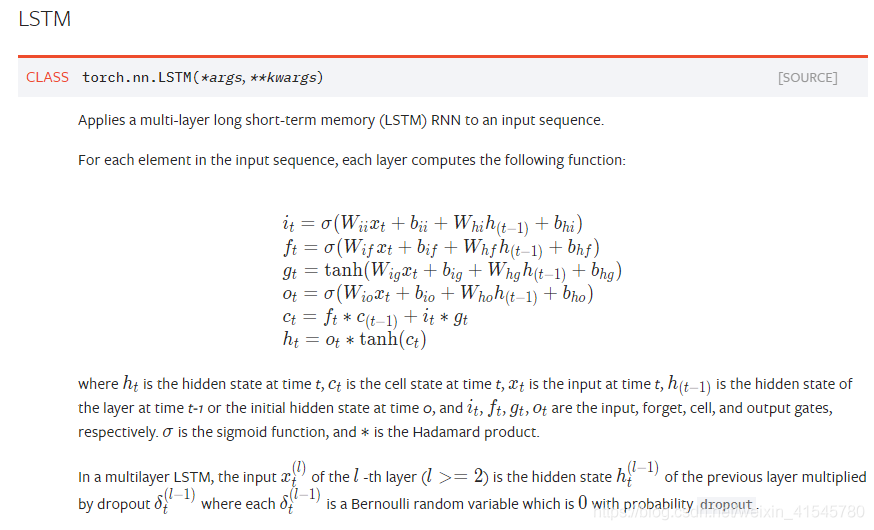

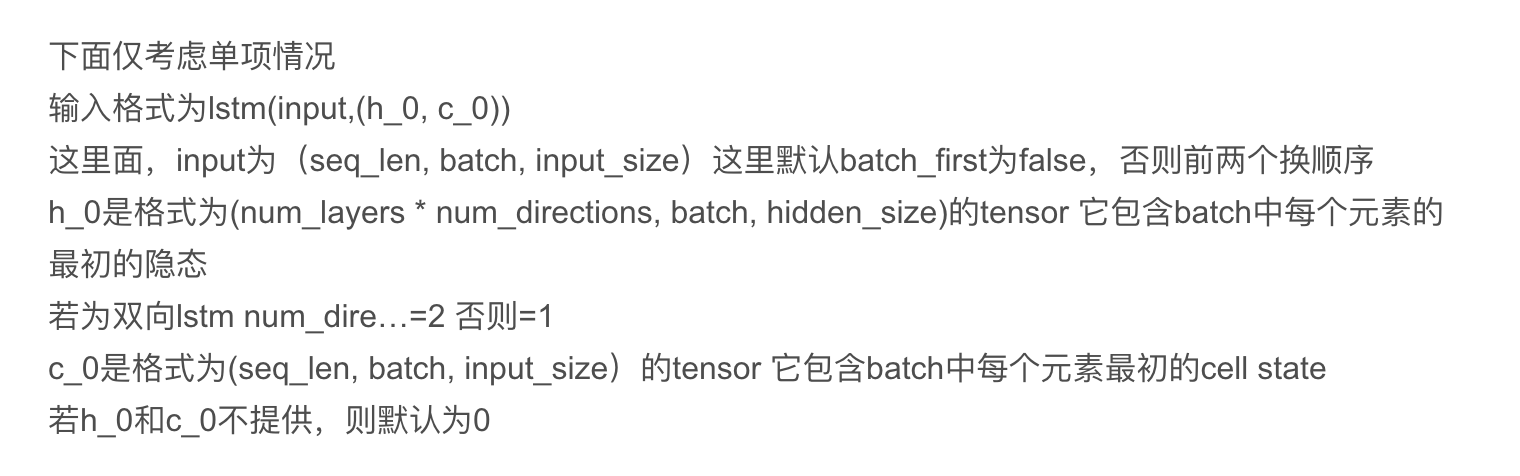

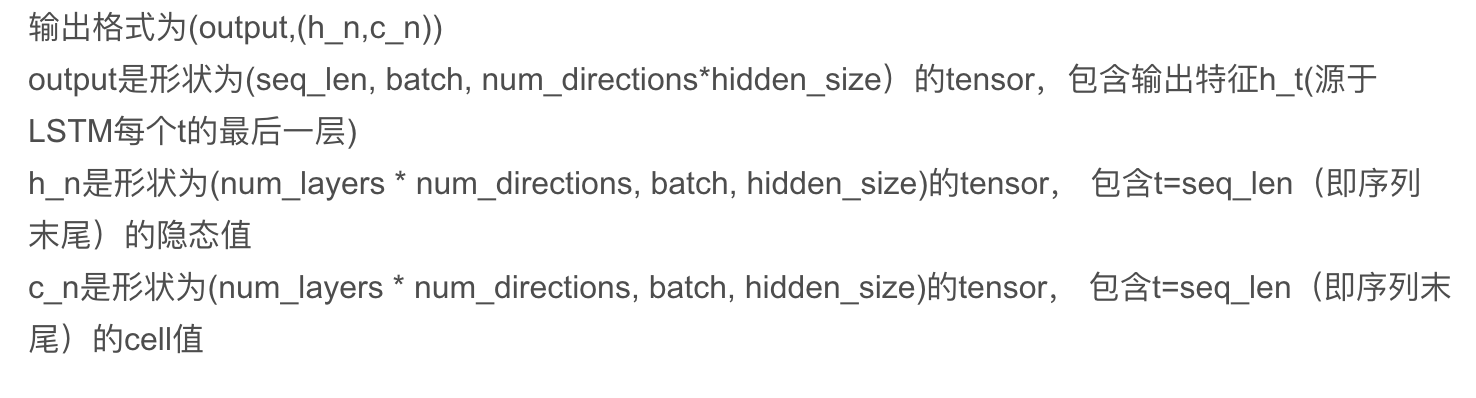

torch.Size([32, 28, 28])

In [8]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all parameters
loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted

# training and testing
for epoch in range(EPOCH):
    for step, (x, b_y) in enumerate(train_loader):   # gives batch data
        b_x = x.view(-1, 28, 28)   # reshape x to (batch, time_step, input_size)
        print(b_x.size())
        output = rnn(b_x)     
        print(output.size())# rnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Siz

torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([6

torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([6

torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Siz

torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Siz

torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([64, 28, 28])
torch.Size([64, 10])
torch.Size([6

In [12]:
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]) real number


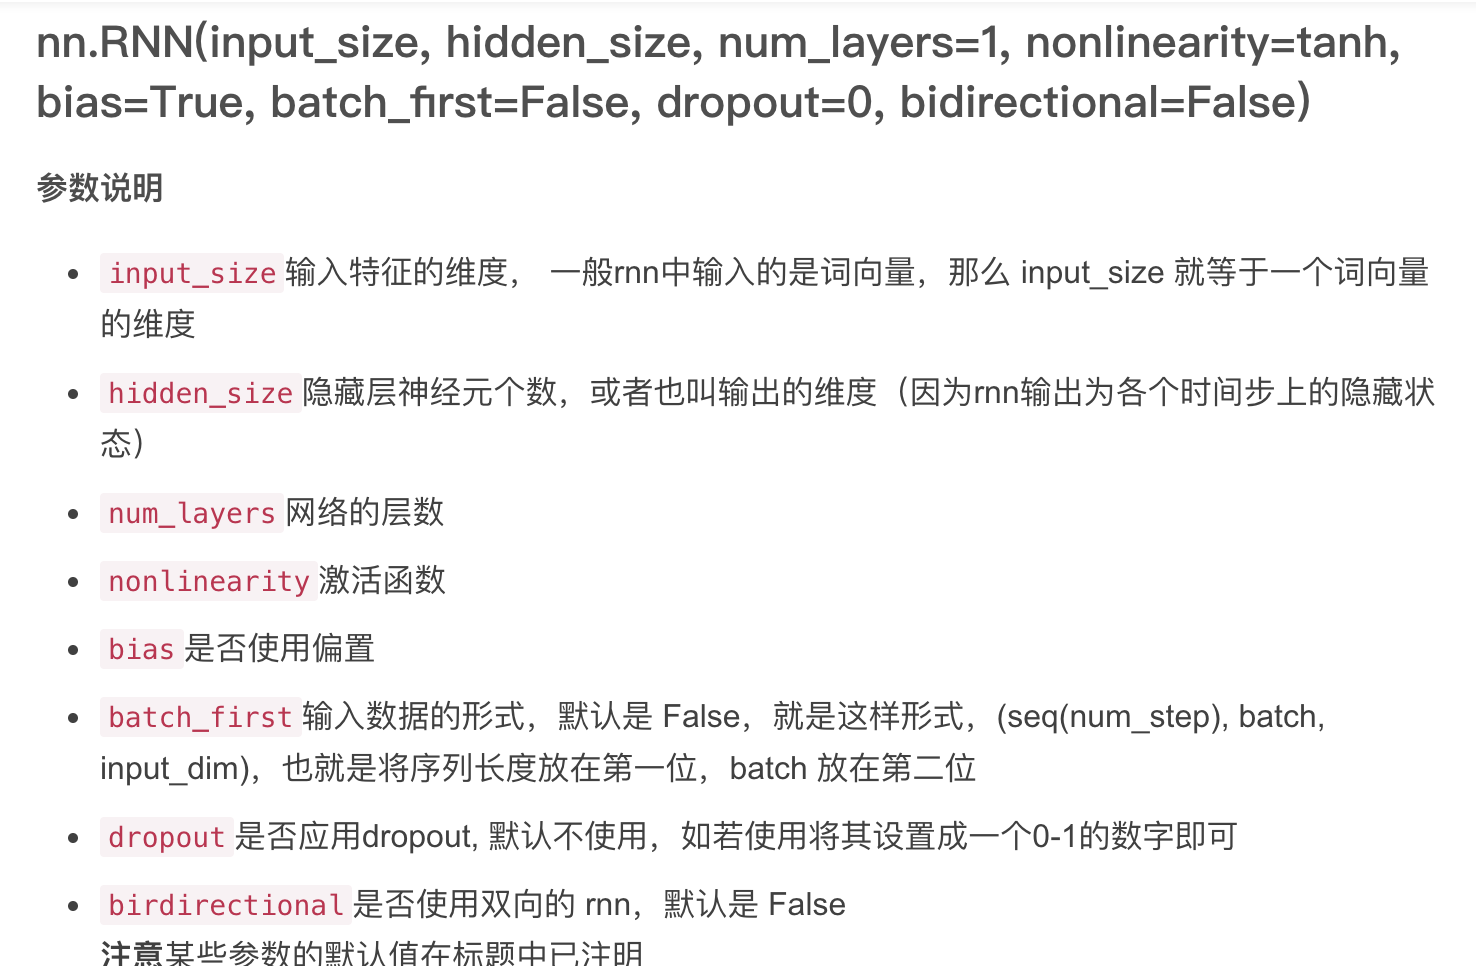

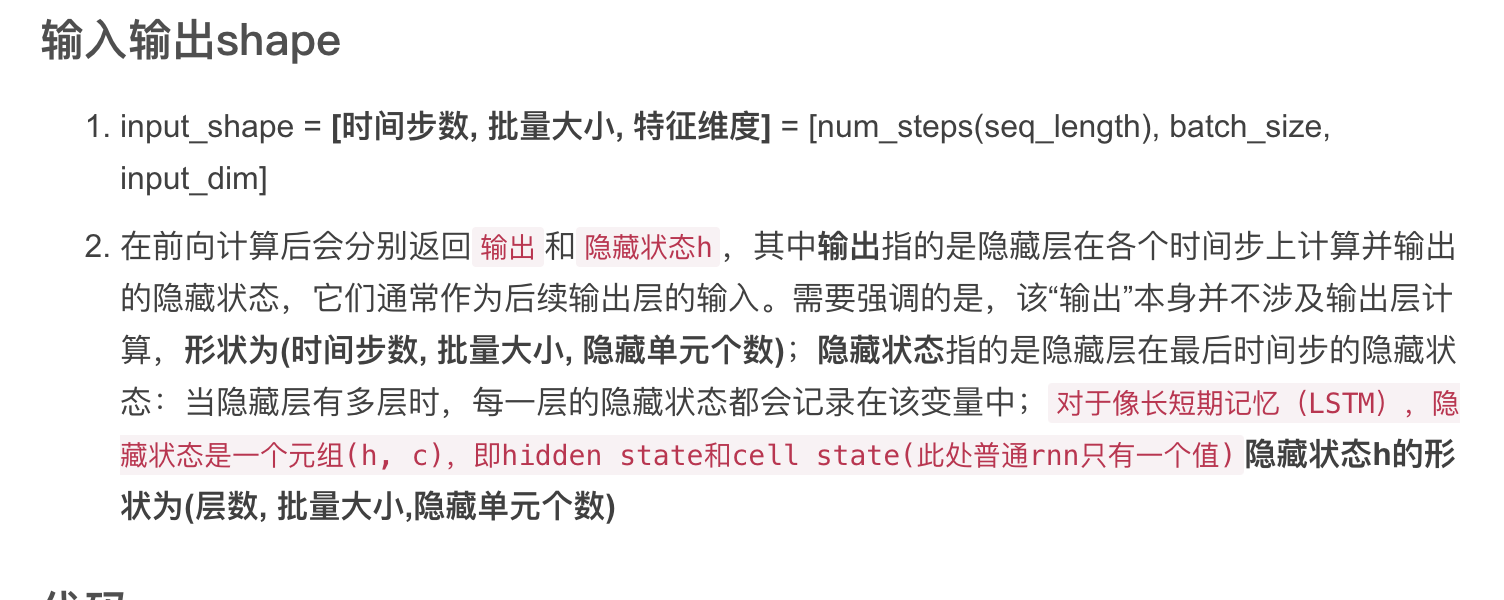

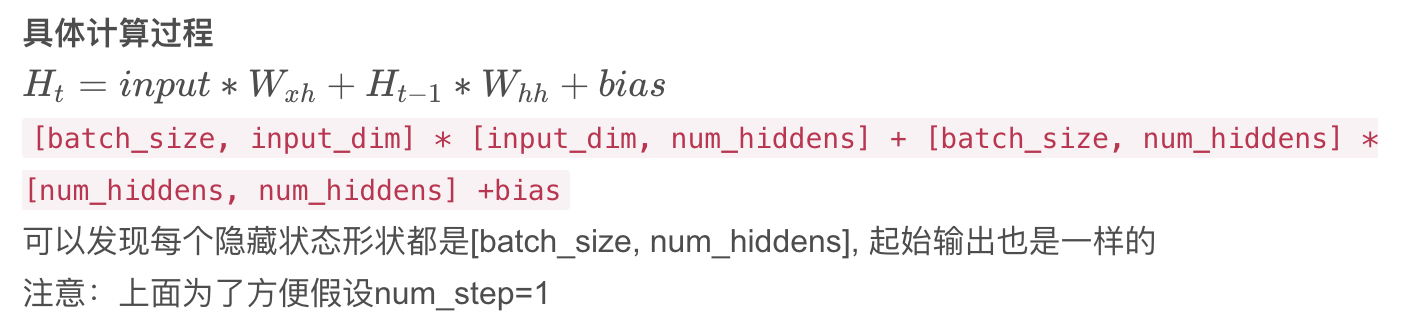

In [1]:
#RNN 回归问题
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1)    # reproducible

# Hyper Parameters
TIME_STEP = 10      # rnn time step / image height
INPUT_SIZE = 1      # rnn input size / image width
LR = 0.02           # learning rate

In [2]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(  # 这回一个普通的 RNN 就能胜任
            input_size=1,
            hidden_size=32,     # rnn hidden unit
            num_layers=1,       # 有几层 RNN layers
            batch_first=True,   # input & output 会是以 batch size 为第一维度的特征集 e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):  # 因为 hidden state 是连续的, 所以我们要一直传递这一个 state
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, output_size)
        r_out, h_state = self.rnn(x, h_state)   # h_state 也要作为 RNN 的一个输入

        outs = []    # 保存所有时间点的预测值
        for time_step in range(r_out.size(1)):    # 对每一个时间点计算 output
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

    '''
    def forward(self, x, h_state):
    r_out, h_state = self.rnn(x, h_state)
    r_out = r_out.view(-1, 32)
    outs = self.out(r_out)
    return outs.view(-1, 32, TIME_STEP), h_state
    '''

rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [3]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all rnn parameters
loss_func = nn.MSELoss()

h_state = None   # 要使用初始 hidden state, 可以设成 None

for step in range(100):
    start, end = step * np.pi, (step+1)*np.pi   # time steps
    # sin 预测 cos
    steps = np.linspace(start, end, 10, dtype=np.float32)
    x_np = np.sin(steps)    # float32 for converting torch FloatTensor
    y_np = np.cos(steps)

    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])    # shape (batch, time_step, input_size)
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])

    prediction, h_state = rnn(x, h_state)   # rnn 对于每个 step 的 prediction, 还有最后一个 step 的 h_state
    # !!  下一步十分重要 !!
    h_state = h_state.data  # 要把 h_state 重新包装一下才能放入下一个 iteration, 不然会报错

    loss = loss_func(prediction, y)     # cross entropy loss
    optimizer.zero_grad()               # clear gradients for this training step
    loss.backward()                     # backpropagation, compute gradients
    optimizer.step() 

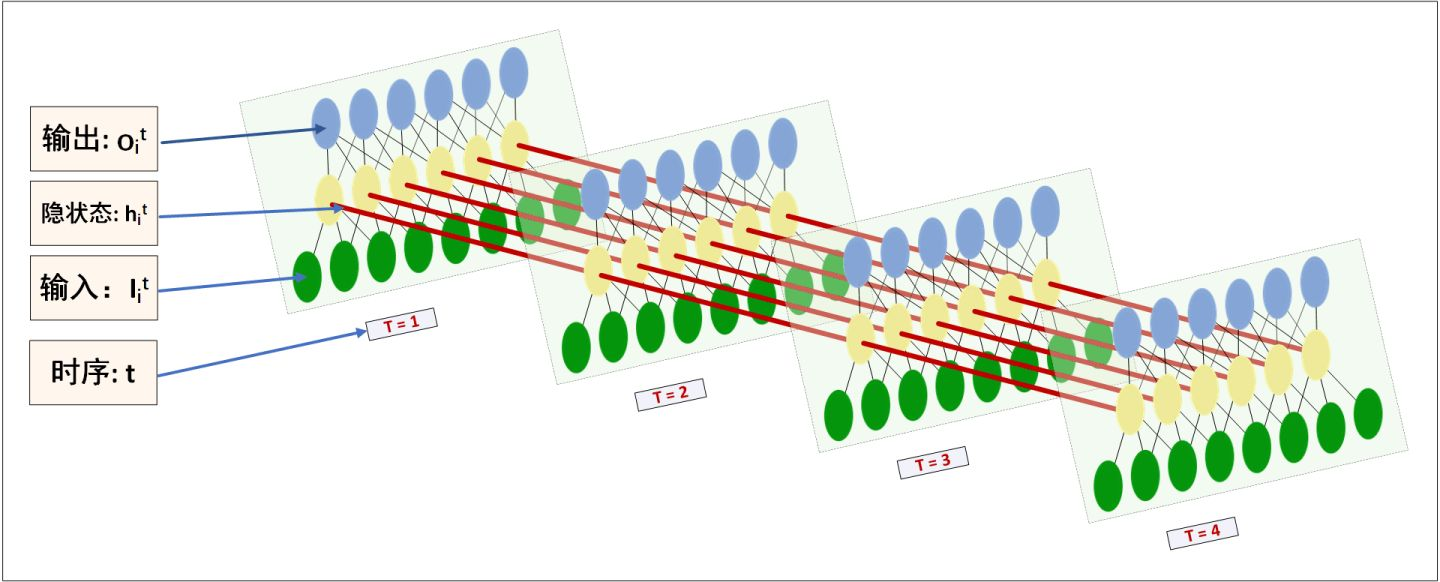
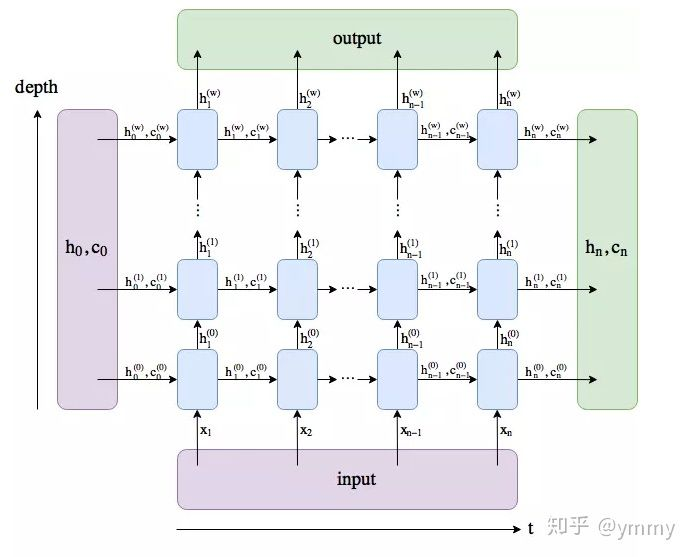